In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# filename="/content/drive/MyDrive/Colab Notebooks/GII-AA/estaciones_madrid_202111.csv"
# datos=pd.read_csv(filename,sep=',',index_col=['ANO','MES','DIA','MUNICIPIO','ESTACION'])
# datos.to_csv("estaciones_madrid_202111.csv")
# drive.flush_and_unmount()

In [26]:
import sklearn as sk
import matplotlib.pyplot as plt

In [27]:
import pandas as pd
filename="estaciones_madrid_202111.csv"
datos=pd.read_csv(filename,sep=',',index_col=['ANO','MES','DIA','MUNICIPIO','ESTACION'])
datos.columns

Index(['SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10', 'NOx', 'O3', 'TOL', 'BEN',
       'EBE'],
      dtype='object')

In [28]:
# Lista de estaciones
import numpy as np
columna_estaciones = [i[4] for i in datos.index]
lista_estaciones = np.unique(columna_estaciones).tolist()
lista_estaciones


[4,
 8,
 11,
 16,
 17,
 18,
 24,
 27,
 35,
 36,
 38,
 39,
 40,
 47,
 48,
 49,
 50,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [29]:
# Vemos un día cualquiera
datos.loc[(2021,1,11,79)]

,SO2,CO,NO,NO2,PM2.5,PM10,NOx,O3,TOL,BEN,EBE
ESTACION,,,,,,,,,,,
8,NaN,0.4,11.0,39.0,NaN,NaN,56.0,NaN,1.0,0.8,0.9
11,NaN,NaN,11.0,51.0,NaN,NaN,68.0,NaN,0.6,0.4,0.1
16,NaN,NaN,19.0,52.0,NaN,NaN,81.0,29.0,NaN,NaN,NaN
17,NaN,NaN,24.0,55.0,NaN,NaN,93.0,22.0,NaN,NaN,NaN
18,NaN,0.5,10.0,44.0,NaN,10.0,59.0,31.0,1.8,0.9,0.3
24,NaN,NaN,4.0,22.0,14.0,15.0,28.0,39.0,0.7,0.7,0.1
27,NaN,NaN,13.0,46.0,NaN,NaN,65.0,33.0,NaN,NaN,NaN
35,5.0,0.4,11.0,44.0,NaN,NaN,61.0,29.0,NaN,NaN,NaN
36,6.0,NaN,17.0,49.0,NaN,12.0,75.0,NaN,NaN,NaN,NaN


In [33]:
# Vemos una estación cualquiera
datos.loc[(slice(None),slice(None),slice(None),slice(None),[8])]

SO2   CO     NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                              
2021 1   1   79        8         2.0  0.2    4.0  23.0    3.0   4.0   29.0   
         2   79        8         3.0  0.3   10.0  36.0    4.0   6.0   51.0   
         3   79        8         2.0  0.4   11.0  42.0    5.0   9.0   58.0   
         4   79        8         2.0  0.4   16.0  47.0    5.0   9.0   73.0   
         5   79        8         3.0  0.5   56.0  61.0   12.0  20.0  147.0   
         6   79        8         3.0  0.4    9.0  41.0    8.0  14.0   55.0   
         7   79        8         2.0  0.4   15.0  43.0    7.0  12.0   65.0   
         8   79        8         2.0  0.3   11.0  35.0    6.0  11.0   52.0   
         9   79        8         2.0  0.3    3.0  24.0    4.0   5.0   29.0   
         10  79        8         2.0  0.3    3.0  27.0    6.0   7.0   32.0   
         11  79        8         NaN  0.4   11.0  39.0    NaN   NaN   56.0   
         12  79        8         NaN  0.5   28.0  57.0    NaN   NaN  100.0   
         13  79        8         NaN  0.6   71.0  69.0    NaN   NaN  178.0   
         14  79        8         NaN  0.8  116.0  76.0    NaN   NaN  254.0   
         15  79        8         NaN  0.9  131.0  78.0    NaN   NaN  279.0   
         16  79        8         NaN  1.1  156.0  82.0    NaN   NaN  321.0   
         17  79        8         NaN  0.9   76.0  68.0    NaN   NaN  185.0   
         18  79        8         NaN  0.7   97.0  83.0    NaN   NaN  231.0   
         19  79        8         3.0  0.5   37.0  72.0   17.0  22.0  128.0   
         20  79        8         2.0  0.5   34.0  72.0   16.0  20.0  125.0   
         21  79        8         2.0  0.3   10.0  32.0    NaN   NaN   47.0   
         22  79        8         2.0  0.3   11.0  32.0    3.0   7.0   48.0   
         23  79        8         2.0  0.2    6.0  20.0    3.0   6.0   30.0   
         24  79        8         2.0  0.2    4.0  19.0    3.0   9.0   26.0   
         25  79        8         2.0  0.3   10.0  28.0    3.0   5.0   43.0   
         26  79        8         2.0  0.3   14.0  30.0    5.0   8.0   52.0   
         27  79        8         2.0  0.4   30.0  32.0    9.0  16.0   78.0   
         28  79        8         2.0  0.3   16.0  25.0    8.0  12.0   49.0   
         29  79        8         2.0  0.3   22.0  27.0    7.0  14.0   61.0   
         30  79        8         2.0  0.2    4.0  20.0    3.0   7.0   26.0   
         31  79        8         2.0  0.2    3.0  17.0    4.0   8.0   21.0   
     2   1   79        8         2.0  0.3    8.0  31.0    4.0  12.0   44.0   
         2   79        8         2.0  0.3   11.0  28.0    4.0   9.0   45.0   
         3   79        8         2.0  0.3   14.0  31.0    5.0   9.0   52.0   
         4   79        8         2.0  0.3   13.0  35.0    8.0  14.0   55.0   
         5   79        8         3.0  0.3   11.0  37.0   12.0  35.0   54.0   
         6   79        8         2.0  0.3    5.0  29.0    7.0  15.0   37.0   
         7   79        8         2.0  0.3    3.0  20.0    3.0   6.0   24.0   
         8   79        8         2.0  0.3    7.0  29.0    2.0   6.0   40.0   
         9   79        8         2.0  0.2    6.0  33.0    2.0   7.0   42.0   
         10  79        8         2.0  0.3    7.0  35.0    4.0  12.0   45.0   
         11  79        8         2.0  0.3   17.0  34.0    6.0  13.0   60.0   
         12  79        8         2.0  0.3    7.0  35.0    5.0  10.0   45.0   
         13  79        8         3.0  0.4    7.0  35.0    6.0  12.0   46.0   
         14  79        8         3.0  0.4    8.0  34.0    7.0  13.0   46.0   
         15  79        8         3.0  0.3    5.0  33.0    7.0  14.0   41.0   
         16  79        8         3.0  0.4   14.0  43.0   12.0  21.0   65.0   
         17  79        8         3.0  0.6   28.0  52.0   13.0  26.0   96.0   
         18  79        8         3.0  0.5   44.0  51.0   23.0  78.0  118.0   
         19  79        8         3.0  0.5   26.0  49.0 

In [72]:
# Seleccion de varias estaciones, dos maneras
# datos.loc[pd.IndexSlice[:,:,:,:,[8,24]], :]

datos.loc[datos.index.get_level_values('ESTACION').isin([8,24])]


SO2   CO    NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                             
2021 1   1   79        8         2.0  0.2   4.0  23.0    3.0   4.0   29.0   
                       24        NaN  NaN   1.0   3.0    3.0   3.0    4.0   
         2   79        8         3.0  0.3  10.0  36.0    4.0   6.0   51.0   
                       24        NaN  NaN   1.0   9.0    3.0   4.0   11.0   
         3   79        8         2.0  0.4  11.0  42.0    5.0   9.0   58.0   
...                              ...  ...   ...   ...    ...   ...    ...   
     11  28  79        24        NaN  NaN   1.0   2.0    3.0   5.0    4.0   
         29  79        8         3.0  0.3  10.0  38.0    4.0   6.0   54.0   
                       24        NaN  NaN   1.0   8.0    3.0   5.0    9.0   
         30  79        8         3.0  0.4  30.0  64.0    9.0  14.0  110.0   
                       24        NaN  NaN  12.0  39.0    8.0  14.0   57.0   

                                   O3  TOL  BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION                       
2021 1   1   79        8         51.0  0.6  0.4  0.2  
                       24        65.0  0.1  0.2  0.1  
         2   79        8         42.0  0.9  0.7  0.2  
                       24        57.0  0.3  0.4  0.1  
         3   79        8         31.0  1.2  0.8  0.3  
...                               ...  ...  ...  ...  
     11  28  79        24        68.0  0.1  0.2  0.1  
         29  79        8         43.0  1.5  0.4  0.2  
                       24        61.0  0.2  0.2  0.1  
         30  79        8         14.0  3.5  0.7  0.5  
                       24        19.0  2.5  0.5  0.2  

[647 rows x 11 columns]

In [87]:
#
# Funciones de utilidad para acceso a un frame que tiene un índice múltiple
#
# Filtra por estación deshaciendo el indice
def filtra_estacion(df,estacion,cols=['SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'PM10',
       'NOx', 'O3', 'TOL', 'BEN', 'EBE']):
    resdf=df.reset_index()
    resdf=resdf[resdf['ESTACION']==estacion]
    resdf=resdf.set_index(['ANO','MES','DIA'])
    return resdf[cols]

# Filtra por estaciones usando el indide
def filtra_estacion_multiindex (df,estacion):
    return df.loc[(slice(None),slice(None),slice(None),slice(None),estacion)]


# Ejemplo que crea un diccionario con los datos separados por estaciones
# Podríamos entrenar con una(s) y probar con otras, por ejemplo
estaciones={ 'estacion_{}'.format(i):filtra_estacion_multiindex(datos,i) for i in lista_estaciones }
for i,est in estaciones.items():
    print ("\n Estacion:{}".format(i))
    print (est.describe())



 Estacion:estacion_4
              SO2          CO          NO         NO2  PM2.5  PM10  \
count  252.000000  262.000000  260.000000  260.000000    0.0   0.0   
mean     9.079365    0.274046   10.626923   27.442308    NaN   NaN   
std      1.740555    0.125083   13.153212   14.753592    NaN   NaN   
min      3.000000    0.100000    1.000000    7.000000    NaN   NaN   
25%      8.000000    0.200000    3.000000   17.750000    NaN   NaN   
50%      9.000000    0.200000    6.000000   25.000000    NaN   NaN   
75%     10.000000    0.300000   12.000000   33.250000    NaN   NaN   
max     12.000000    1.000000   81.000000   91.000000    NaN   NaN   

              NOx   O3  TOL  BEN  EBE  
count  260.000000  0.0  0.0  0.0  0.0  
mean    43.696154  NaN  NaN  NaN  NaN  
std     33.997672  NaN  NaN  NaN  NaN  
min      9.000000  NaN  NaN  NaN  NaN  
25%     23.750000  NaN  NaN  NaN  NaN  
50%     34.000000  NaN  NaN  NaN  NaN  
75%     52.250000  NaN  NaN  NaN  NaN  
max    215.000000  NaN  NaN

In [35]:
filtro=[8]
estaciones=datos.loc[(slice(None),slice(None),slice(None),slice(None),filtro)].copy()
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 330 entries, (2021, 1, 1, 79, 8) to (2021, 11, 30, 79, 8)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     318 non-null    float64
 1   CO      326 non-null    float64
 2   NO      329 non-null    float64
 3   NO2     329 non-null    float64
 4   PM2.5   305 non-null    float64
 5   PM10    304 non-null    float64
 6   NOx     329 non-null    float64
 7   O3      320 non-null    float64
 8   TOL     314 non-null    float64
 9   BEN     306 non-null    float64
 10  EBE     310 non-null    float64
dtypes: float64(11)
memory usage: 32.9 KB


In [36]:
# Eliminamos las filas que tienen nulos
estaciones=estaciones.dropna(axis=0)
estaciones.info()
estaciones.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 266 entries, (2021, 1, 1, 79, 8) to (2021, 11, 30, 79, 8)
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     266 non-null    float64
 1   CO      266 non-null    float64
 2   NO      266 non-null    float64
 3   NO2     266 non-null    float64
 4   PM2.5   266 non-null    float64
 5   PM10    266 non-null    float64
 6   NOx     266 non-null    float64
 7   O3      266 non-null    float64
 8   TOL     266 non-null    float64
 9   BEN     266 non-null    float64
 10  EBE     266 non-null    float64
dtypes: float64(11)
memory usage: 27.0 KB


SO2   CO    NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                             
2021 1   1   79        8         2.0  0.2   4.0  23.0    3.0   4.0   29.0   
         2   79        8         3.0  0.3  10.0  36.0    4.0   6.0   51.0   
         3   79        8         2.0  0.4  11.0  42.0    5.0   9.0   58.0   
         4   79        8         2.0  0.4  16.0  47.0    5.0   9.0   73.0   
         5   79        8         3.0  0.5  56.0  61.0   12.0  20.0  147.0   

                                   O3  TOL  BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION                       
2021 1   1   79        8         51.0  0.6  0.4  0.2  
         2   79        8         42.0  0.9  0.7  0.2  
         3   79        8         31.0  1.2  0.8  0.3  
         4   79        8         33.0  1.9  0.8  0.3  
         5   79        8         22.0  2.8  1.1  0.6

In [40]:
from sklearn.preprocessing import LabelEncoder

# Discretizaremos la columna objetivo, por ejemplo PM10 > 20
target_col = 'PM10'
rangos=[0,20]

PM100_class=pd.cut(estaciones[target_col],rangos)
le = LabelEncoder()
PM100_class_encoded = le.fit_transform(PM100_class)
PM100_class_encoded



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [46]:
# Eliminamos la columnas que no queramos 
# borra_columnas = ['PM10']
borra_columnas = []
X = estaciones.drop(columns=borra_columnas)
y = PM100_class_encoded

X.head()



SO2   CO    NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                             
2021 1   1   79        8         2.0  0.2   4.0  23.0    3.0   4.0   29.0   
         2   79        8         3.0  0.3  10.0  36.0    4.0   6.0   51.0   
         3   79        8         2.0  0.4  11.0  42.0    5.0   9.0   58.0   
         4   79        8         2.0  0.4  16.0  47.0    5.0   9.0   73.0   
         5   79        8         3.0  0.5  56.0  61.0   12.0  20.0  147.0   

                                   O3  TOL  BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION                       
2021 1   1   79        8         51.0  0.6  0.4  0.2  
         2   79        8         42.0  0.9  0.7  0.2  
         3   79        8         31.0  1.2  0.8  0.3  
         4   79        8         33.0  1.9  0.8  0.3  
         5   79        8         22.0  2.8  1.1  0.6

In [47]:
datos_clase=X.copy()
datos_clase['Clase']=y

#datos_clase.to_csv("laboratorio_datos_exportados.csv")
datos_clase.head()

SO2   CO    NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                             
2021 1   1   79        8         2.0  0.2   4.0  23.0    3.0   4.0   29.0   
         2   79        8         3.0  0.3  10.0  36.0    4.0   6.0   51.0   
         3   79        8         2.0  0.4  11.0  42.0    5.0   9.0   58.0   
         4   79        8         2.0  0.4  16.0  47.0    5.0   9.0   73.0   
         5   79        8         3.0  0.5  56.0  61.0   12.0  20.0  147.0   

                                   O3  TOL  BEN  EBE  Clase  
ANO  MES DIA MUNICIPIO ESTACION                              
2021 1   1   79        8         51.0  0.6  0.4  0.2      0  
         2   79        8         42.0  0.9  0.7  0.2      0  
         3   79        8         31.0  1.2  0.8  0.3      0  
         4   79        8         33.0  1.9  0.8  0.3      0  
         5   79        8         22.0  2.8  1.1  0.6      0

In [48]:
# Para este primer ejemplo vamos a usar Decision Trees de scikit-learn
# Explicación de los parámetros en:
#  https://www.tutorialspoint.com/scikit_learn/scikit_learn_decision_trees.htm

from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split



In [49]:
# Generamos un conjunto de train y otro de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
X_train.shape,X_test.shape

((186, 11), (80, 11))

In [50]:
arbol_todas_columnas = tree.DecisionTreeClassifier()
arbol_todas_columnas = arbol_todas_columnas.fit(X_train, y_train)


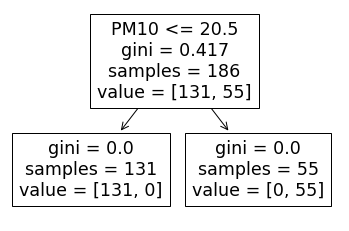

In [51]:
# Como tenemos el objetivo entre las columnas, el árbol es trivial
_=tree.plot_tree(arbol_todas_columnas,feature_names=list(X_train.columns))


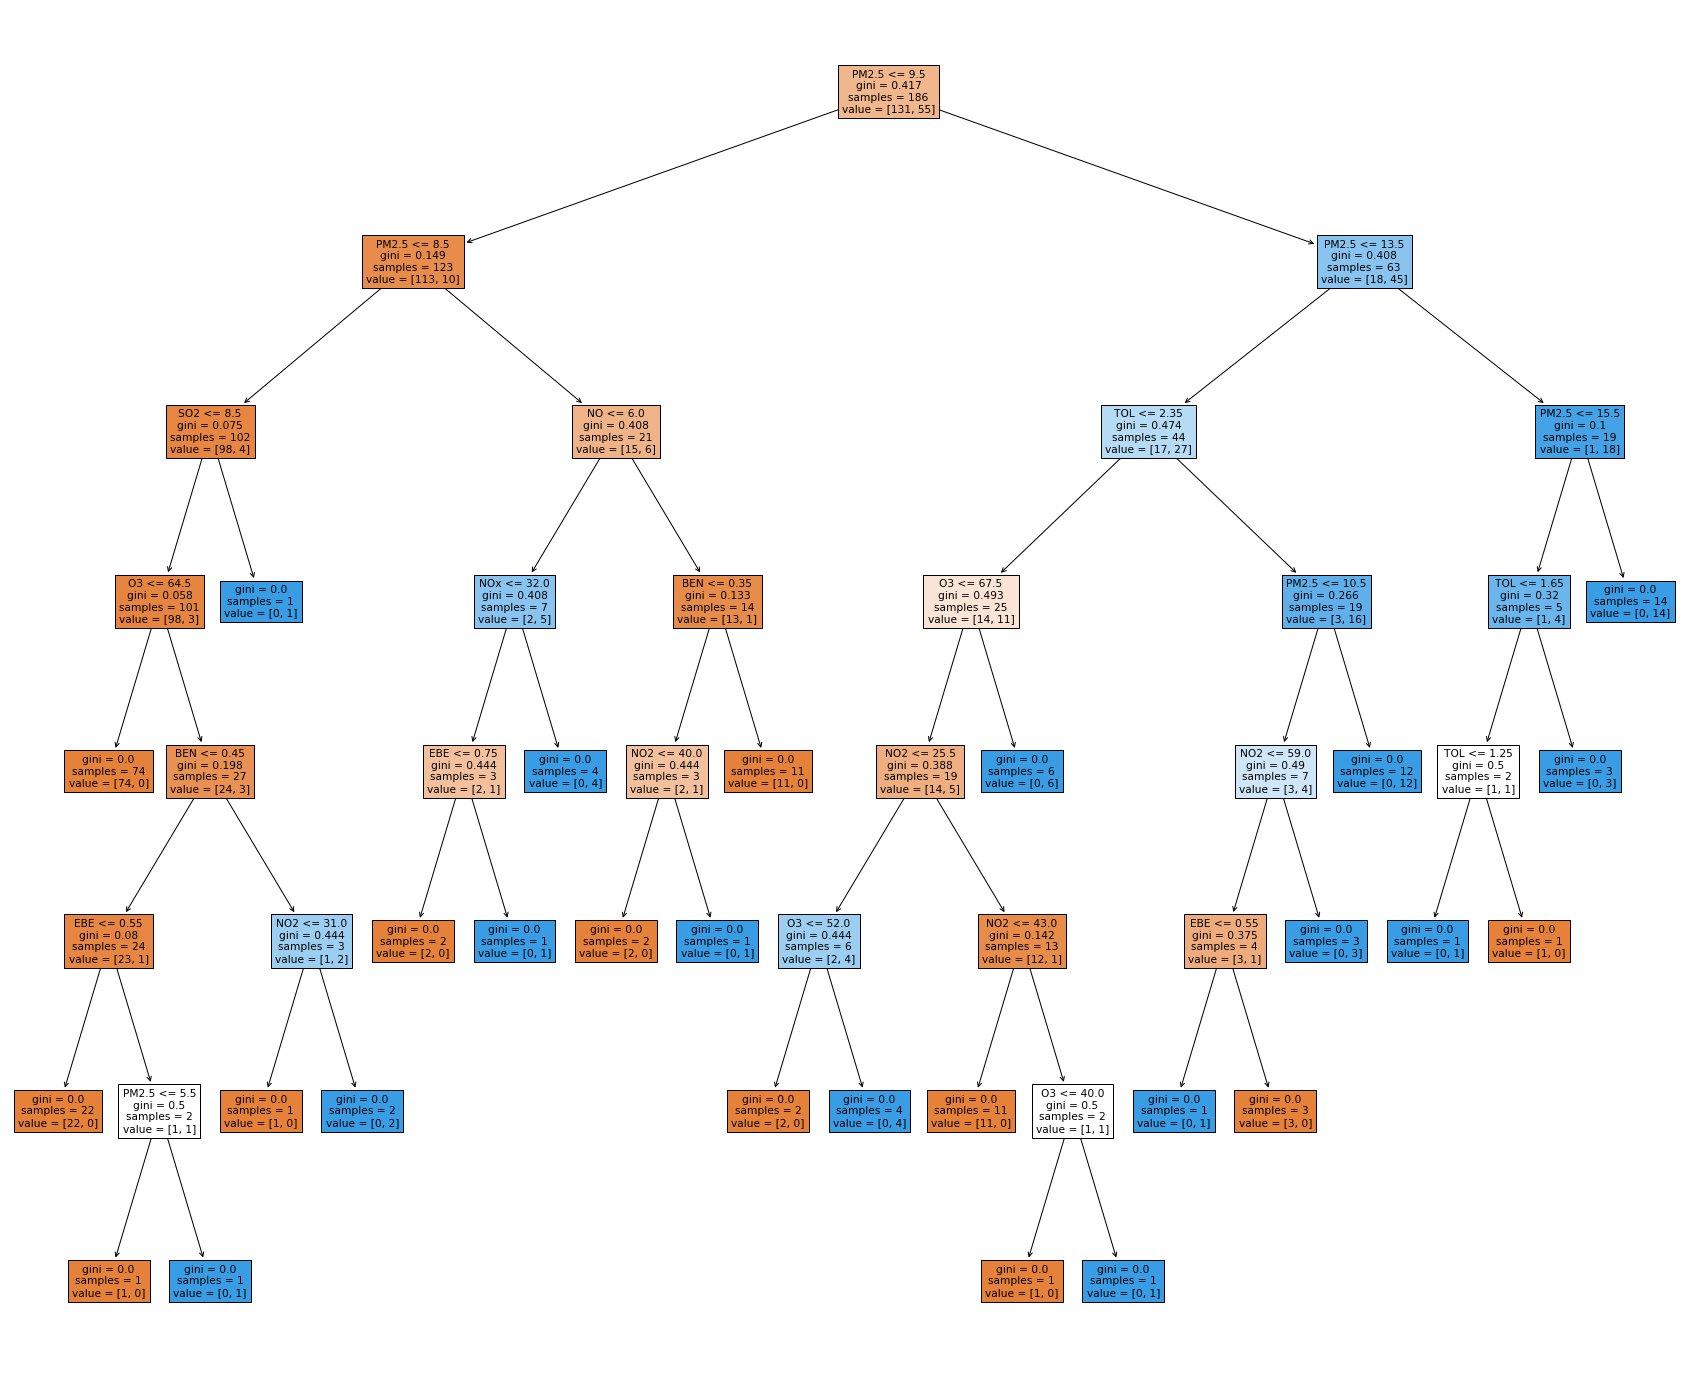

In [52]:
# Borramos la columna PM10 y vemos que el resultado depende de la columna PM2.5
borra_columnas = ['PM10']

X=estaciones.drop(columns=borra_columnas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
arbol_2 = tree.DecisionTreeClassifier()
arbol_2 = arbol_2.fit(X_train, y_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_2,feature_names=list(X_train.columns),filled=True)


In [56]:
print(X.columns)
print(arbol_2.feature_importances_)


Index(['SO2', 'CO', 'NO', 'NO2', 'PM2.5', 'NOx', 'O3', 'TOL', 'BEN', 'EBE'], dtype='object')
[0.02406631 0.         0.04978685 0.10709511 0.53406704 0.01966888
 0.11754651 0.06571318 0.03365223 0.04840389]


55

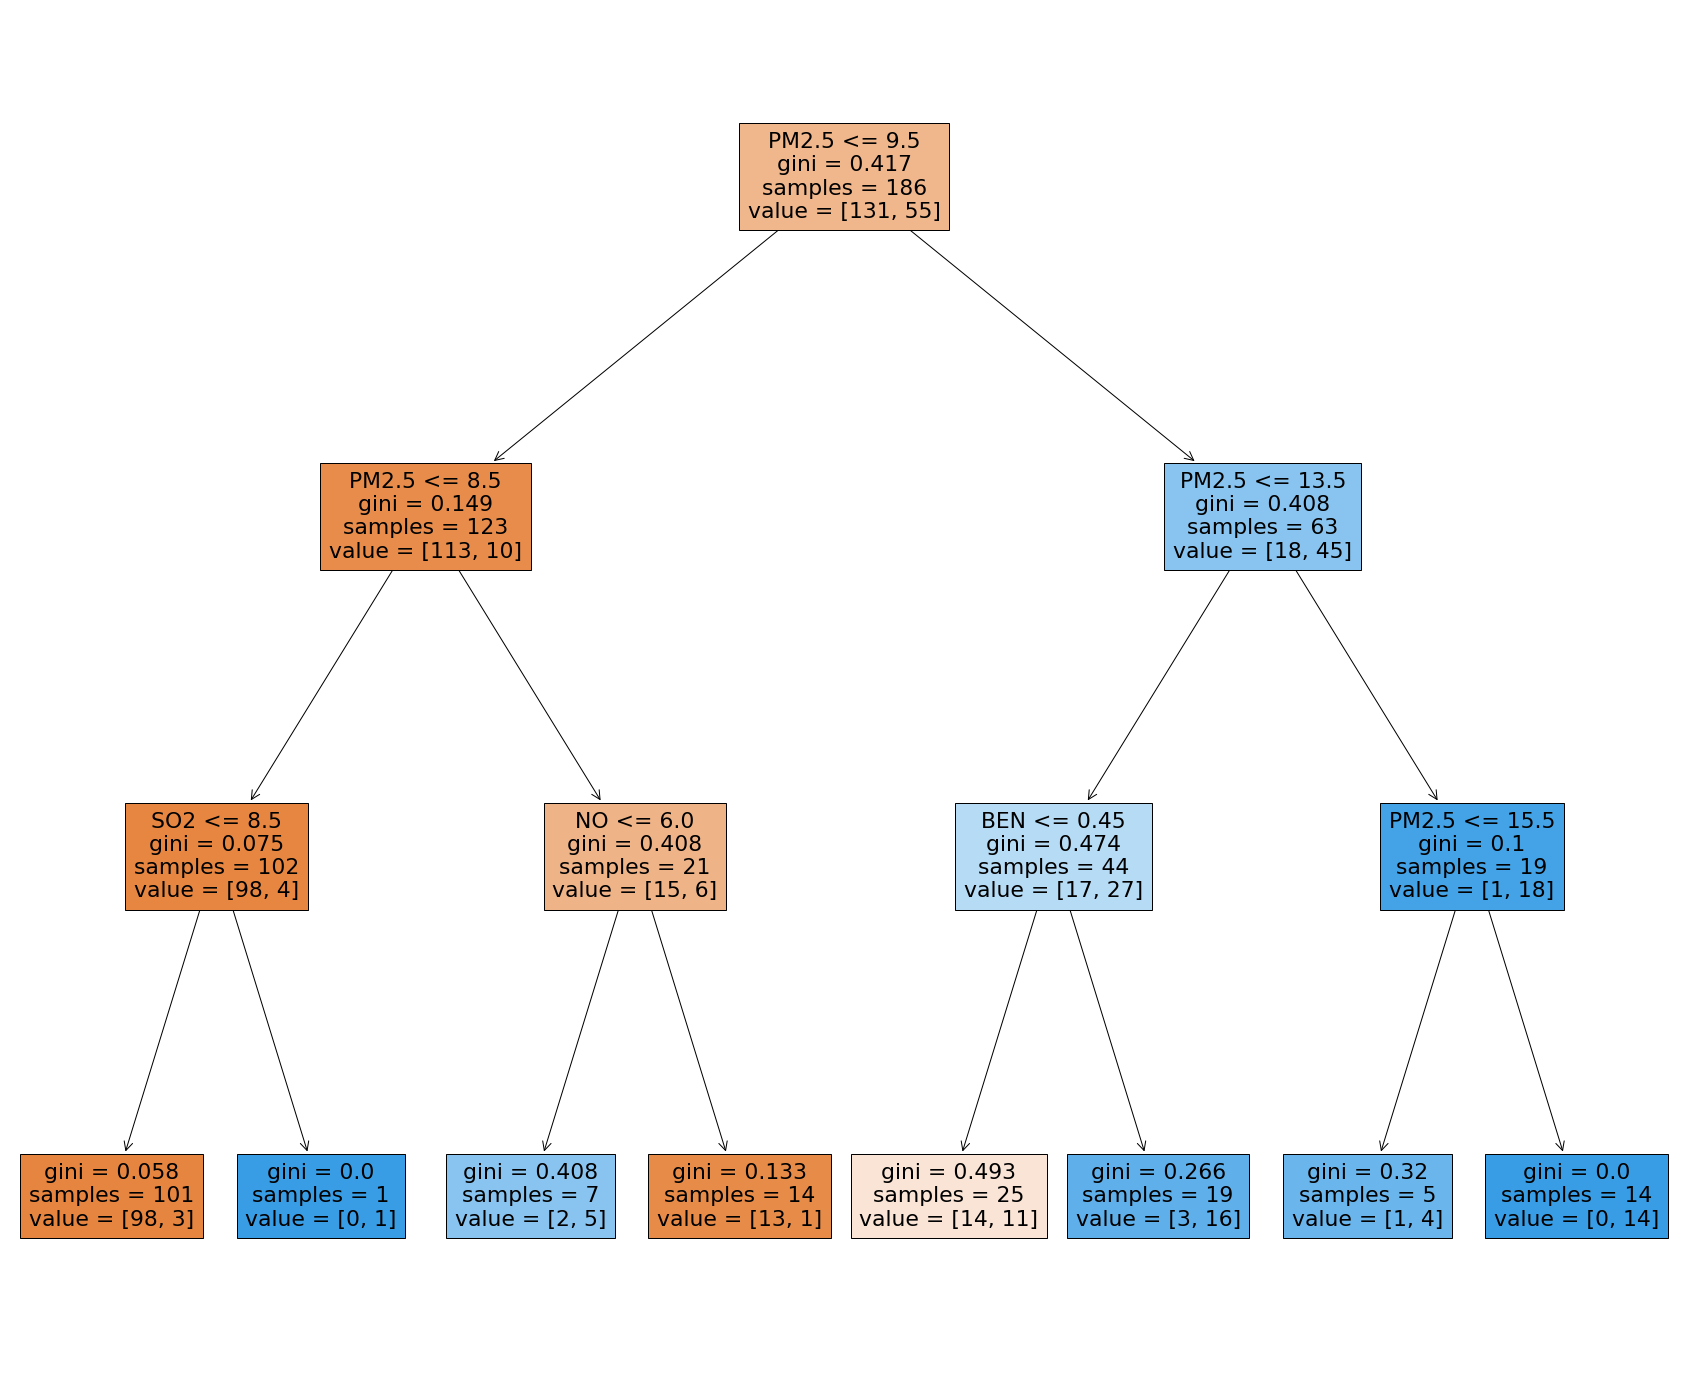

In [55]:
# Si se deja sin límíte de profundidad, los árboles quedan sobreajustados, vamos a fijar una profundidad máxima
arbol_3 = tree.DecisionTreeClassifier(max_depth=3)
arbol_3 = arbol_3.fit(X_train, y_train)
fig=plt.figure(figsize=(30,25))
_=tree.plot_tree(arbol_3,feature_names=list(X_train.columns),filled=True)

TRAIN
Accuracy:  0.8870967741935484
F1:  0.792079207920792
TEST
Accuracy:  0.9125
F1:  0.8372093023255814
[[55  4]
 [ 3 18]]


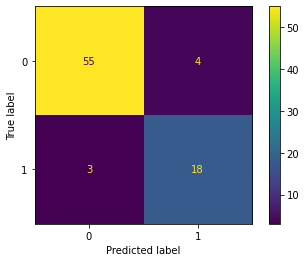

In [59]:
# Métricas de evaluación
# Para entender el formato de la matriz de confusión:
# https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79

from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

y_train_predicted=arbol_3.predict(X_train)
train_cnf=confusion_matrix(y_train,y_train_predicted)
print ("TRAIN")
print ("Accuracy: ", accuracy_score(y_train,y_train_predicted))
print ("F1: ", f1_score(y_train,y_train_predicted))
# print ('Confusion matrix for Train (rows:expected, columns:predicted):')
# print (train_cnf)

y_test_predicted=arbol_3.predict(X_test)
test_cnf=confusion_matrix(y_test,y_test_predicted)
print ("TEST")
print ("Accuracy: ", accuracy_score(y_test,y_test_predicted))
print ("F1: ", f1_score(y_test,y_test_predicted))
# print ('Confusion matrix for Test (rows:expected, columns:predicted):')
print (test_cnf)

_=ConfusionMatrixDisplay(test_cnf).plot()

In [95]:
# Seleccion de varias estaciones

# Filtra por estaciones usando el indice
def filtra_estaciones_multiindex (df,estaciones):
    return df.loc[df.index.get_level_values('ESTACION').isin(estaciones)]

def procesar_columna(datos,columna,rangos):
    # Discretizaremos la columna objetivo, por ejemplo PM10 > 20

    clases=pd.cut(datos[columna],rangos)
    le = LabelEncoder()
    clases_codificadas = le.fit_transform(clases)
    return clases_codificadas


filtro2=[8,24]
estaciones_8_24=filtra_estaciones_multiindex(datos,filtro2)
estaciones_8_24=estaciones_8_24.drop(columns=['SO2','CO'])
estaciones_8_24=estaciones_8_24.dropna(axis=0)
estaciones_8_24_clases=procesar_columna(estaciones_8_24,'PM10',[0,20])
print('Clases:',estaciones_8_24_clases)
estaciones_8_24.info()
estaciones_8_24


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

NO   NO2  PM2.5  PM10    NOx    O3  TOL  \
ANO  MES DIA MUNICIPIO ESTACION                                              
2021 1   1   79        8          4.0  23.0    3.0   4.0   29.0  51.0  0.6   
                       24         1.0   3.0    3.0   3.0    4.0  65.0  0.1   
         2   79        8         10.0  36.0    4.0   6.0   51.0  42.0  0.9   
                       24         1.0   9.0    3.0   4.0   11.0  57.0  0.3   
         3   79        8         11.0  42.0    5.0   9.0   58.0  31.0  1.2   
...                               ...   ...    ...   ...    ...   ...  ...   
     11  28  79        24         1.0   2.0    3.0   5.0    4.0  68.0  0.1   
         29  79        8         10.0  38.0    4.0   6.0   54.0  43.0  1.5   
                       24         1.0   8.0    3.0   5.0    9.0  61.0  0.2   
         30  79        8         30.0  64.0    9.0  14.0  110.0  14.0  3.5   
                       24        12.0  39.0    8.0  14.0   57.0  19.0  2.5   

                                 BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION            
2021 1   1   79        8         0.4  0.2  
                       24        0.2  0.1  
         2   79        8         0.7  0.2  
                       24        0.4  0.1  
         3   79        8         0.8  0.3  
...                              ...  ...  
     11  28  79        24        0.2  0.1  
         29  79        8         0.4  0.2  
                       24        0.2  0.1  
         30  79        8         0.7  0.5  
                       24        0.5  0.2  

[570 rows x 9 columns]

In [74]:
# Seleccion de varias estaciones
filtro=[8,24]
filtra_estaciones_multiindex(datos,filtro)


SO2   CO    NO   NO2  PM2.5  PM10    NOx  \
ANO  MES DIA MUNICIPIO ESTACION                                             
2021 1   1   79        8         2.0  0.2   4.0  23.0    3.0   4.0   29.0   
                       24        NaN  NaN   1.0   3.0    3.0   3.0    4.0   
         2   79        8         3.0  0.3  10.0  36.0    4.0   6.0   51.0   
                       24        NaN  NaN   1.0   9.0    3.0   4.0   11.0   
         3   79        8         2.0  0.4  11.0  42.0    5.0   9.0   58.0   
...                              ...  ...   ...   ...    ...   ...    ...   
     11  28  79        24        NaN  NaN   1.0   2.0    3.0   5.0    4.0   
         29  79        8         3.0  0.3  10.0  38.0    4.0   6.0   54.0   
                       24        NaN  NaN   1.0   8.0    3.0   5.0    9.0   
         30  79        8         3.0  0.4  30.0  64.0    9.0  14.0  110.0   
                       24        NaN  NaN  12.0  39.0    8.0  14.0   57.0   

                                   O3  TOL  BEN  EBE  
ANO  MES DIA MUNICIPIO ESTACION                       
2021 1   1   79        8         51.0  0.6  0.4  0.2  
                       24        65.0  0.1  0.2  0.1  
         2   79        8         42.0  0.9  0.7  0.2  
                       24        57.0  0.3  0.4  0.1  
         3   79        8         31.0  1.2  0.8  0.3  
...                               ...  ...  ...  ...  
     11  28  79        24        68.0  0.1  0.2  0.1  
         29  79        8         43.0  1.5  0.4  0.2  
                       24        61.0  0.2  0.2  0.1  
         30  79        8         14.0  3.5  0.7  0.5  
                       24        19.0  2.5  0.5  0.2  

[647 rows x 11 columns]